In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset

from data import IcoDataset
from model import IcoPredictor
from train_utils import train
from data_processing import get_processed_data


In [96]:
test_size = 0.2
batch_size = 64

data_dir = Path("dataset")
data_path = data_dir / "ico_dataset_cleaned_v2.csv"
normalize=True
one_hot_encode=True
x, y = get_processed_data(data_path, normalize=normalize, one_hot_encode=one_hot_encode)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
train_dataset = IcoDataset(x_train, y_train)
test_dataset = IcoDataset(x_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [97]:
model = IcoPredictor(features=x.shape[1], shallow_nodes=128)
criterion = torch.nn.MSELoss()
learning_rate = 3e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


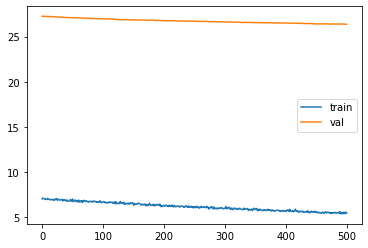

In [101]:
train_losses, val_losses = train(500, model, train_dataloader, test_dataloader, criterion, optimizer)
plt.plot(train_losses**0.5, label="train")
plt.plot(val_losses**0.5, label="val")
plt.legend()
plt.show()

In [84]:
y.min()

0.0